In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

from numpy import linalg

from sklearn.datasets import load_wine
samples, labels = load_wine(return_X_y=True)
labels = np.array(labels)

In [2]:
# must set one of numPC or accuracy
def pca(X, dim=None, accuracy=None):
    u, d, v = linalg.svd(X)
    if accuracy is not None:
        energy = linalg.norm(X)**2
        sumEig = 0
        for i, eigval in enumerate(list(d)):
            sumEig += eigval**2
            if sumEig / energy >= accuracy:
                dim = i + 1
                break
    return u[:, :dim]

# Standardize Data

(59, 2)
(71, 2)
(48, 2)


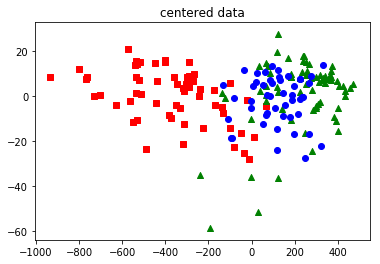

In [8]:
center_data = samples - np.mean(samples, axis=0)[np.newaxis,:]
comp = pca(center_data.T, dim=2)
feat = center_data @ comp

colors = ['r', 'g', 'b']
markers = ['s', '^', 'o']

for i, (c, m) in enumerate(zip(colors, markers)):
    class_samp = feat[np.where(labels==i)]
    print(class_samp.shape)
    plt.scatter(class_samp[:,0], class_samp[:,1], c=c,marker=m)

plt.title('centered data')

(59, 2)
(71, 2)
(48, 2)


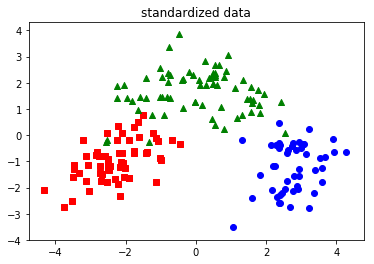

In [9]:
variances = np.var(center_data, axis=0)[np.newaxis, :]
std_data = center_data / np.sqrt(variances)
comp = pca(std_data.T, dim=2)
feat = std_data @ comp

for i, (c, m) in enumerate(zip(colors, markers)):
    class_samp = feat[np.where(labels==i)]
    print(class_samp.shape)
    plt.scatter(class_samp[:,0], class_samp[:,1], c=c,marker=m)

plt.title('standardized data')

The standardized data creates better PCA features. In the plot for standardized data, the classes appear to be much more separable.

# Naive Bayes Classification

In [ ]:
class NaiveBayesClassifier:
    
    def __init__(data, labels, priors):
        self.priors = priors
        self.n_classes = len(priors)
        self.means = np.zeros(self.n_classes)
        self.variances = np.zeros(self.n_classes)
        for i in range(self.n_classes):
            class_data = data[np.where(labels==i)]
            self.means[i] = np.average(class_data, axis=1)
            self.variances[i] = np.var(class_data, axis=1)
    
    def classify(sample):
        self.probs = np.copy(self.priors)
        for i in range(self.n_classes):
            for m, v in zip(self.means[i], self.variances[i]):
                prob = 1/math.sqrt(2*math.pi*v)*math.exp()